<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1.2 Elements of Linear Algebra

## 1.2.1 Linear Spaces

In [7]:
import numpy as np
import sympy as sp

Key Concepts:

Linear Combination - The sum of multiple vectors which have been multiplied by a scalar.


In [8]:
#Example of Linear Combination
a1 = np.array([1,5,9])
a2 = np.array([1,3,-2])
a3 = np.array([-3,-5,28])

b1 = 2
b2 = 3

linearCombinationAB = (b1 * a1) + (b2 * a2)
print("Linear combination solution:")
print(linearCombinationAB)

Linear combination solution:
[ 5 19 12]



Linear Subspace - A subset of a vector space that conforms to the axioms of scalar multiplication and vector additon.

Span - The vector space which represents all the linear combinations of vectors in a set.

Column Space - The span of the columns in a matrix.

Linear independece - If a set of vectors cannot be written as a linear combination of each other using non-zero constants such that in no instance:

(b1 * a1) + (b2 *a2) + (b3 + a3) = →0



Linear dependence - If a set of vectors can be written as a linear combination of each other using non-zero constants such that:

(b1 * a1) + (b2 *a2) + (b3 + a3) = →0

In [9]:

#example of linear dependence
M = np.matrix([[1,1,-3], [5,3,-5], [9,-2,28]])
print("Matrix of vector space a1, a2, and a3:")
print(M)

print("Solution matrix:")
M_rref = sp.Matrix(M).rref()
#rref function simplifies matrix so that the first entry of each row begins with 1 and is the only nonzero term in the column
print(M_rref)

Matrix of vector space a1, a2, and a3:
[[ 1  1 -3]
 [ 5  3 -5]
 [ 9 -2 28]]
Solution matrix:
(Matrix([
[1, 0,  2],
[0, 1, -5],
[0, 0,  0]]), (0, 1))


The solution matrix indicates that the set of vectors a1, a2, and a3 is linearly dependent because the matrix has a nonzero solution. Specifically wheen b1 = -2, b2 = 5, and b3 = 1. This can be shown by multiplying vectors a1, a2, and a3 by these respective values, which equals the zero vector:

In [10]:
b1 = -2
b2 = 5
b3 = 1
result = (b1 * a1) + (b2 * a2) + (b3 * a3)
print("Solution of linear combination:")
print(result)

Solution of linear combination:
[0 0 0]


##1.2.2 Orthogonality

Orthogonal Vectors - Two vectors are considered orthogonal if they are perpendicular with eachother. Orthoginal Vectors must have a dot product of zero.

In [11]:
#example of orthogonal vectors
a1 = np.array([3,1,1])
a2 = np.array([-1,2,1])

dot_Prod = a1.dot(a2)
print("dot product:")
print(dot_Prod)

dot product:
0


Orthogonal Basis - A vector space for which all vectors are mutually orthogonal indicates the set has an orthogonal basis. The dot product of any two vectors in the set must equal zero.

In [12]:
#example of vector space with an orthogonal basis
a3 = np.array([-1/2, -2, 7/2])

dot_Prod2 = a1.dot(a3)
dot_Prod3 = a2.dot(a3)

print("dot product of ab, ac, and bc:")
print(dot_Prod)
print(dot_Prod2)
print(dot_Prod3)

dot product of ab, ac, and bc:
0
0.0
0.0


A better way to prove a vector space (matrix) has an orthogonal basis is to perform matrix multiplication of the transpose of the matrix onto the vector space (denoted A_T * A). If the result equals a diagonal matrix, the set has an orthogonal basis.

In [13]:
M = np.matrix([a1, a2, a3])
M = M.T
print("matrix of vector space:")
print(M)

M_T = M.T
print("transposition of vector space:")
print(M_T)
#The transposition matrix is created by switching the rows and columns of the original matrix

result = M_T * M
print("resulting matrix:")
print(result)

matrix of vector space:
[[ 3.  -1.  -0.5]
 [ 1.   2.  -2. ]
 [ 1.   1.   3.5]]
transposition of vector space:
[[ 3.   1.   1. ]
 [-1.   2.   1. ]
 [-0.5 -2.   3.5]]
resulting matrix:
[[11.   0.   0. ]
 [ 0.   6.   0. ]
 [ 0.   0.  16.5]]


Best Approximation Theorem - States that the closest approximation from a vector to elements in a subspace is the orthogonal projection of the vector onto the subspace.

Orthogonal Projection: given vectors a and b

Pro$j_b$(a) = ((a ⋅ b)/(b ⋅ b))b

In [14]:
#example of orthogonal projection of b onto a
a = np.array([4,5,6])
b = np.array([1,6,3])
#computing the dot product of a onto b and b onto itself
adotb = a.dot(b)
bdotb = b.dot(b)

result = (adotb/bdotb)*b
print("b projected onto a:")
print(result)

b projected onto a:
[1.13043478 6.7826087  3.39130435]


##1.2.3. Gram–Schmidt process

A process to create an orthogonal basis given a set of linearly independent vectors

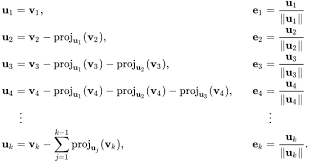

In [15]:
#Confirming that vectors a1, a2, and a3 are linearly independent
a1 = np.array([3,1,1])
a2 = np.array([-1,2,1])
a3 = np.array([-1/2, -2, 7/2])
M = np.matrix([a1,a2,a3])
M = M.T
print("matrix of vector space:")
print(M)
M_rref = sp.Matrix(M).rref()
print("solution matrix:")
print(M_rref)



matrix of vector space:
[[ 3.  -1.  -0.5]
 [ 1.   2.  -2. ]
 [ 1.   1.   3.5]]
solution matrix:
(Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]), (0, 1, 2))


Because each row only contains one number, the only solution to this matrix occurs when the coefficients b1, b2, and b3 are all equal to zero. Therefore, the set of vectors is linearly indepdendent.

In [16]:
#defining helper methods
def proj(b,a): #computes the projection of a vector b onto another vector a
  adotb = a.dot(b)
  bdotb = b.dot(b)

  return (adotb/bdotb)*b

def mag(a): #computes the magnitude of vector a
  result = 0
  for i in range(len(a)):
    result = result + pow(a[i],2)

  return pow(result,1/2)

def gram(a,b,c): #computes the gram-schmidt process on linearly indpendent vectors a, b, and c
  #finding the orthogonal components
  u1 = a
  u2 = b - proj(a,b)
  u3 = c - proj(a,c) - proj(b,c)
  #normalizing the matrix
  e1 = (u1/mag(u1))
  e2 = (u2/mag(u2))
  e3 = (u3/mag(u3))
  M = np.array([e1, e2, e3])
  return M.T

print("Matrix of vector space:")
print(M)
print("Orthogonal basis matrix")
print(gram(a1,a2,a3))

Matrix of vector space:
[[ 3.  -1.  -0.5]
 [ 1.   2.  -2. ]
 [ 1.   1.   3.5]]
Orthogonal basis matrix
[[ 0.90453403 -0.40824829 -0.12309149]
 [ 0.30151134  0.81649658 -0.49236596]
 [ 0.30151134  0.40824829  0.86164044]]


##1.2.4. Eigenvalues and eigenvectors

Eigenvalues and Eigenvectors - Ax = λx. Where A is a square matrix and λ is the eigenvalue corresponding to the eigenvector x.

Equation for finding eigenvalues on a random 2x2 matrix:
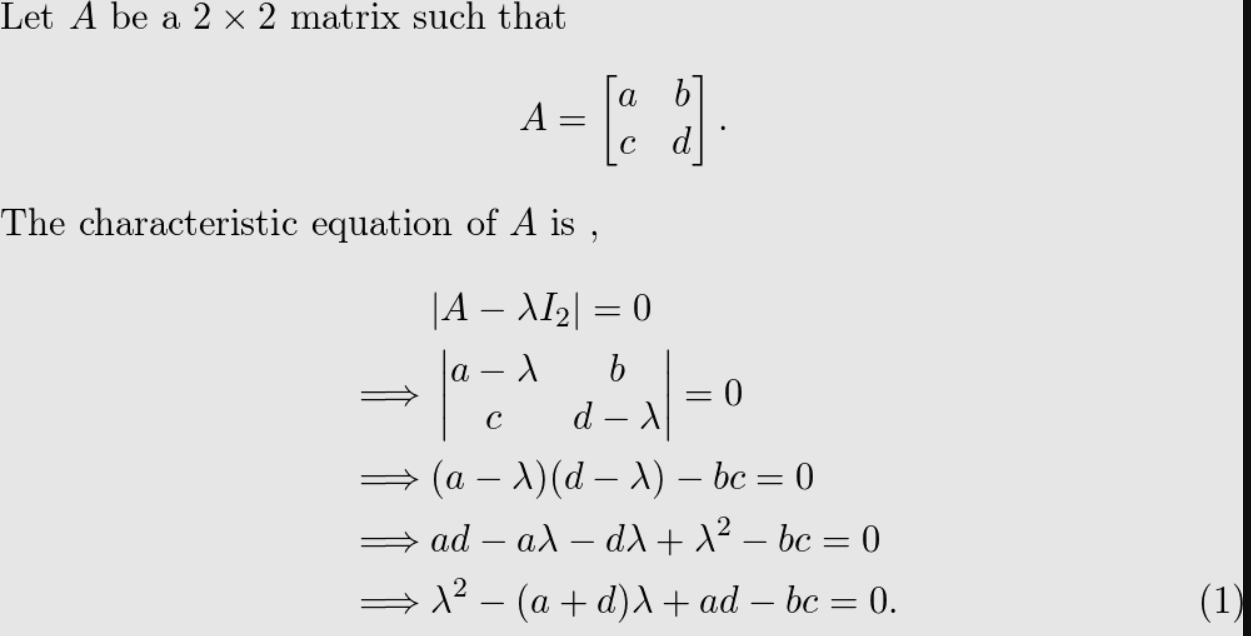



In [73]:
from sympy import *

a1 = np.array([5,1,1])
a2 = np.array([0,2,1])
a3 = np.array([0,1,2])
M = np.matrix([a1,a2,a3])
M = M.T
print("Starting Matrix:")
print(M)

def find_EV(M): #method to compute eigenvalues
  if(M.shape[0] != M.shape[1]): #check to confirm matrix is square
    print("Matrix is not square")
    return np.empty(0)

  eValues = np.linalg.eigvals(M)#computes eigenvalues using numpy method
  return eValues
print("Eigenvalues:")
eVal = find_EV(M)
print(eVal)

def find_EVEC(M): #method to compute eigenvectors
  if(find_EV(M).size > 0): #confirms that the matrix has eigenvectors
    eVal = find_EV(M)
    M1 = np.copy(M) #creating a copy of M so it can be iterated
    for i in range(eVal.size): #iterating through the multiple eigenvalues
      for j in range(M1.shape[0]): #iterating as many times as the size of the matrix
        M1[j,j] -= eVal[i] #subtracting the eigenvalue from the diagonal
      print("Eigenvector:")
      M2 = sp.Matrix(M1) #making M1 a sympy variable so sympy functions work
      e1 = M2.nullspace() #taking the null space of the Eigenvector matrix
      print(e1) #prints eigenvector
      M1 = np.copy(M) #resets M1 so it can be iterated again for more eigenvectors

find_EVEC(M)


Starting Matrix:
[[5 0 0]
 [1 2 1]
 [1 1 2]]
Eigenvalues:
[3. 1. 5.]
Eigenvector:
[Matrix([
[0],
[1],
[1]])]
Eigenvector:
[Matrix([
[ 0],
[-1],
[ 1]])]
Eigenvector:
[Matrix([
[2],
[1],
[1]])]
